In [163]:
# Import the necessary packages to runtime
import scipy.stats as stats
import zipcodes as zcode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import statsmodels.api as sm

#SkLearn library
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split

#AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# To plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import plot_confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

# Build Model and Decision tree imports
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 400)

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [164]:
df = pd.read_csv('backpain.csv')

In [165]:
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.02782,22.55259,39.60912,40.47523,98.67292,-0.25440,0.74450,12.56610,14.53860,15.30468,-28.65850,43.51230,Abnormal
1,39.05695,10.06099,25.01538,28.99596,114.40543,4.56426,0.41519,12.88740,17.53230,16.78486,-25.53061,16.11020,Abnormal
2,68.83202,22.21848,50.09219,46.61354,105.98514,-3.53032,0.47489,26.83430,17.48610,16.65897,-29.03189,19.22210,Abnormal
3,69.29701,24.65288,44.31124,44.64413,101.86850,11.21152,0.36935,23.56030,12.70740,11.42447,-30.47025,18.83290,Abnormal
4,49.71286,9.65207,28.31741,40.06078,108.16872,7.91850,0.54336,35.49400,15.95460,8.87237,-16.37838,24.91710,Abnormal


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


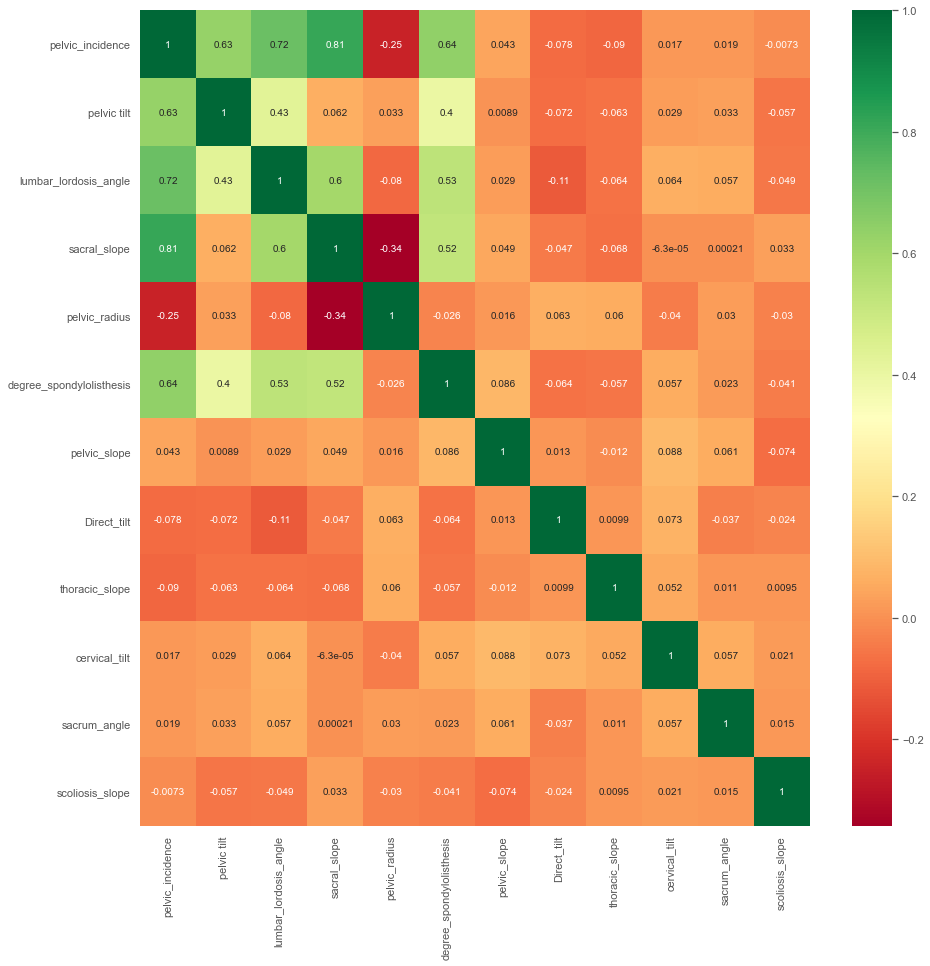

In [167]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn') 

In [168]:
df['Status'].replace({'Abnormal':1, 'Normal':0}, inplace=True)

In [169]:
df.Status.value_counts()

1    210
0    100
Name: Status, dtype: int64

In [170]:
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.02782,22.55259,39.60912,40.47523,98.67292,-0.25440,0.74450,12.56610,14.53860,15.30468,-28.65850,43.51230,1
1,39.05695,10.06099,25.01538,28.99596,114.40543,4.56426,0.41519,12.88740,17.53230,16.78486,-25.53061,16.11020,1
2,68.83202,22.21848,50.09219,46.61354,105.98514,-3.53032,0.47489,26.83430,17.48610,16.65897,-29.03189,19.22210,1
3,69.29701,24.65288,44.31124,44.64413,101.86850,11.21152,0.36935,23.56030,12.70740,11.42447,-30.47025,18.83290,1
4,49.71286,9.65207,28.31741,40.06078,108.16872,7.91850,0.54336,35.49400,15.95460,8.87237,-16.37838,24.91710,1


In [171]:
df.tail()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
305,47.90357,13.61669,36.00000,34.28688,117.44906,-4.24540,0.12974,7.84330,14.74840,8.51707,-15.72893,11.54720,0
306,53.93675,20.72150,29.22053,33.21525,114.36584,-0.42101,0.04791,19.19860,18.19720,7.08745,6.01384,43.86930,0
307,61.44660,22.69497,46.17035,38.75163,125.67072,-2.70788,0.08107,16.20590,13.55650,8.89572,3.56446,18.41510,0
308,45.25279,8.69316,41.58313,36.55963,118.54584,0.21475,0.15925,14.73340,16.09280,9.75922,5.76731,33.71920,0
309,33.84164,5.07399,36.64123,28.76765,123.94524,-0.19925,0.67450,19.38250,17.69630,13.72929,1.78301,40.60490,0


In [172]:
X = df.drop(['Status'],axis = 1)
Y = df['Status']

In [173]:
X.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.02782,22.55259,39.60912,40.47523,98.67292,-0.25440,0.74450,12.56610,14.53860,15.30468,-28.65850,43.51230
1,39.05695,10.06099,25.01538,28.99596,114.40543,4.56426,0.41519,12.88740,17.53230,16.78486,-25.53061,16.11020
2,68.83202,22.21848,50.09219,46.61354,105.98514,-3.53032,0.47489,26.83430,17.48610,16.65897,-29.03189,19.22210
3,69.29701,24.65288,44.31124,44.64413,101.86850,11.21152,0.36935,23.56030,12.70740,11.42447,-30.47025,18.83290
4,49.71286,9.65207,28.31741,40.06078,108.16872,7.91850,0.54336,35.49400,15.95460,8.87237,-16.37838,24.91710


In [174]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [175]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [176]:
print("Original Status True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Status'] == 1]), (len(df.loc[df['Status'] == 1])/len(df.index)) * 100))
print("Original Status False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Status'] == 0]), (len(df.loc[df['Status'] == 0])/len(df.index)) * 100))
print("")
print("Training Status True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Status False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Status True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Status False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Status True Values    : 210 (67.74%)
Original Status False Values   : 100 (32.26%)

Training Status True Values    : 147 (67.74%)
Training Status False Values   : 70 (32.26%)

Test Status True Values        : 63 (67.74%)
Test Status False Values       : 30 (32.26%)



In [177]:
# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

        0       1        2        3        4       5        6       7  \
0 0.02320 0.09967 -0.01676 -0.07647 -0.03163 0.17252 -0.14859 0.00865   

         8       9       10       11  intercept  
0 -0.01819 0.21316 -0.00896 -0.00247    1.12907  


In [178]:
model_score = model.score(x_test, y_test)
print(model_score)

0.8494623655913979


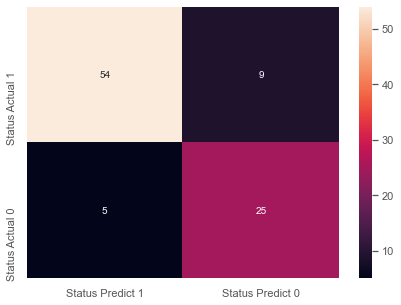

In [179]:
# Print the confusion matrix 
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Status Actual 1","Status Actual 0"]],
                  columns = [i for i in ["Status Predict 1","Status Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

In [180]:
# Use the DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)
print("Accuracy :: Train ", model.score(x_train, y_train), " :: Test ", model.score(x_test, y_test))
print("Recall :: Train ", metrics.recall_score(y_train, ytrain_predict), " :: Test ", metrics.recall_score(y_test, ytest_predict))

Accuracy :: Train  1.0  :: Test  0.7956989247311828
Recall :: Train  1.0  :: Test  0.8253968253968254


In [181]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [182]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [183]:
model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(x_train, y_train)

In [184]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, x_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.86636,0.89796,0.90411,0.90102


In [195]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [203]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(5, 10, 15), None],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=array([5]),
                       min_impurity_decrease=1e-06, random_state=42)

In [204]:
grid_obj.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=array([5]),
                       min_impurity_decrease=1e-06, random_state=42)

In [205]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [206]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.93088,0.97959,0.92308,0.95050


In [207]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [193]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00000
1,0.00456,0.00913
2,0.00691,0.01604
3,0.00691,0.02986
4,0.00737,0.03724
5,0.00776,0.06052
6,0.00889,0.06941
7,0.01083,0.09106
8,0.01158,0.10264
9,0.01317,0.11581


In [210]:
column_names = list(X.columns)
feature_names = column_names

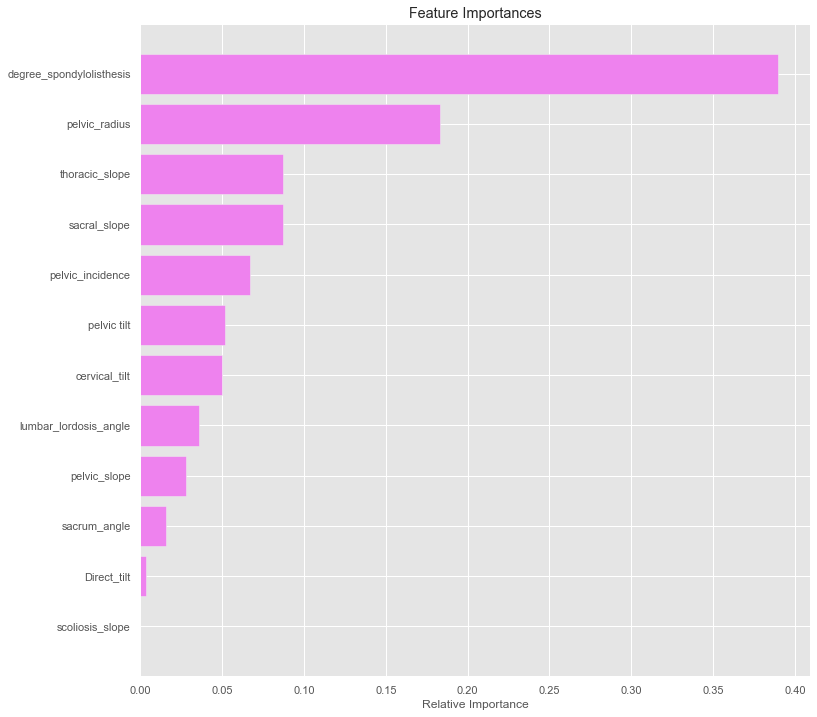

In [211]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

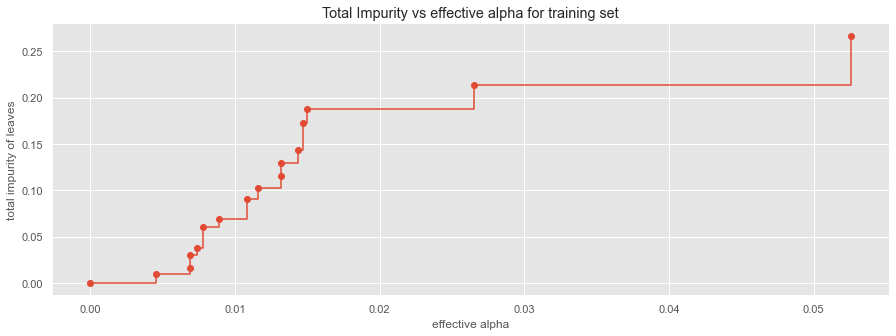

In [212]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [214]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17025215923580223


In [216]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [217]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

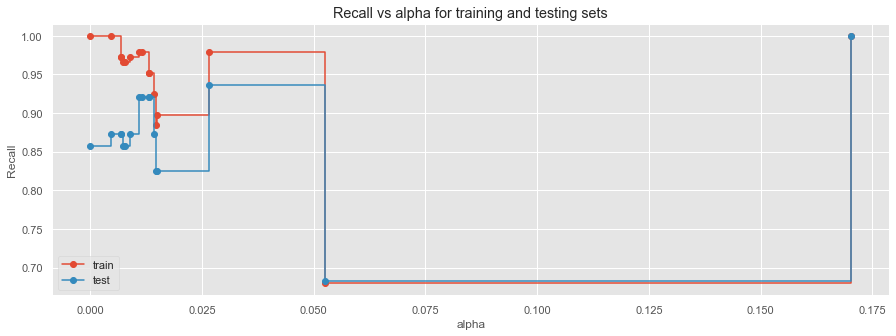

In [231]:
fig, ax = plt.subplots(figsize=(15, 5))
values=range(len(ccp_alphas))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
#plt.xticks(ccp_alphas, values)
plt.show()